In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Desktop/Datasets/titanic.csv")

In [3]:
data.head() # Viewing the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df=pd.read_csv("Desktop/Datasets/titanic.csv",usecols=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df["Sex"]=le.fit_transform(df["Sex"]) # converting strings to numerical values

In [10]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [11]:
df=df.fillna(df["Age"].mean()) # filling NaN values in Age Column by the mean

In [12]:
df.info() # now all columns contain 891 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [13]:
df.loc[2] # to locate a particular row

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [14]:
input_cols=["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols=["Survived"]

In [15]:
X=df[input_cols]
Y=df[output_cols]

In [43]:
def entropy(col):
    counts=np.unique(col,return_counts=True)          # np.unique will return 3 things 1.category of unique elements 2. frequency of unique elements 3.dtype
    N=float(col.shape[0])
    
    ent=0.0
    for i in counts[1]:
        p=i/N
        ent+=(-1.0*p*np.log2(p))
    return ent

In [64]:
def divide_data(x_data,fkey,fval): # binary splitting column fkey using threshold value fval
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]

        if val>fval:
            x_right=x_right.append(x_data.loc[ix])
        else:
            x_left=x_left.append(x_data.loc[ix])
    return x_left,x_right

In [45]:
def info_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    # all exmaples come to one side
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [65]:
for fx in X.columns:
    print(fx)
    print(info_gain(df,fx,df[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [47]:
class DecisionTree:
    
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
        
    def train(self,X_train):
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains=[]
        
        for ix in features:
            i_gain=info_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
        
        self.fkey=features[np.argmax(info_gains)]
        self.fval=X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #split data
        data_left,data_right=divide_data(X_train,self.fkey,self.fval)
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        #Truely a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean() >=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return
        
        #reached max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return
        
        #Recursive Case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        if X_train.Survived.mean() >=0.5:
            self.target="Survive"
        else:
            self.target="Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [16]:
split=int(0.7*df.shape[0])
train_data=df[:split]
test_data=df[split:]
test_data=test_data.reset_index(drop=True)

In [49]:
dt=DecisionTree()

In [50]:
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [51]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [52]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [54]:
#y_pred

In [55]:
y_actual = test_data[output_cols]

In [56]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [57]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [58]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [59]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [60]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [61]:
print(acc)

0.8171641791044776


In [67]:
## Using Sklearn library

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
sk_dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [19]:
sk_dt.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
sk_dt.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [21]:
sk_dt.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=4b0fa0ac0a62aee620f8c2c7a62f88ee047b7fabd9bf724174562597758f59c7
  Stored in directory: C:\Users\Sagar\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [25]:
dot_data = StringIO()
export_graphviz(sk_dt,out_file=dot_data,filled=True,rounded=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
X_train=train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [23]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [24]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [27]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf.score(X_train,Y_train)

0.8394863563402889

In [30]:
rf.score(X_test,Y_test)

0.8470149253731343

In [31]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [33]:
acc

0.8138783410138248

In [68]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [69]:
print(acc_list)

[0.7592323604710701, 0.7514502816180235, 0.775283973374296, 0.7849488991295444, 0.7963029185867896, 0.801116026625704, 0.807337224782386, 0.8058394265232975, 0.801116026625704, 0.813942652329749, 0.810742037890425, 0.7915537122375832, 0.8026779313876089, 0.8124317460317461, 0.80116763952893, 0.8106400409626217, 0.8170402457757296, 0.8091930363543266, 0.7964311315924218, 0.7947666154633897, 0.8235684587813619, 0.8187299539170507, 0.8090783410138249, 0.8171295442908345, 0.8058392217101895, 0.8155295442908346, 0.8139039426523297, 0.7963287250384024, 0.8011162314388122, 0.8202783410138249, 0.8267555555555557, 0.8234787506400411, 0.8250533538146442, 0.8186656426011265, 0.8251557603686634, 0.8123039426523297, 0.8090906298003071, 0.8170910394265233, 0.829879160266257, 0.825078750640041, 0.813942242703533, 0.8155037378392217, 0.8122527393753198, 0.821853149001536, 0.8186912442396312, 0.8075291346646185, 0.8154654377880185, 0.8202144393241169, 0.8202787506400411]


In [70]:
np.argmax(acc_list)

38

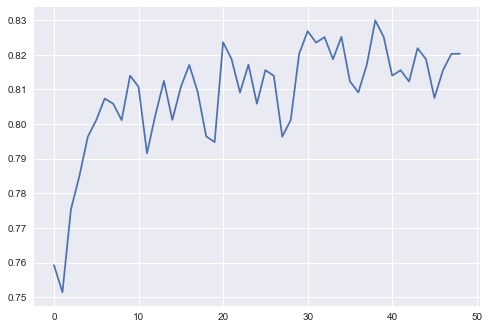

In [71]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [72]:
rf = RandomForestClassifier(n_estimators=39,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=39,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
rf.score(X_train,Y_train)

0.8523274478330658

In [74]:
rf.score(X_test,Y_test)

0.8395522388059702